In [1]:
import pandas as pd
data= pd.read_csv('Tatacoffee13_21.csv', parse_dates=['Date'], index_col='Date')
dataset=data.loc['2021-07-01':'2022-01-28']
dataset

,Open,High,Low,Close
Date,,,,
2021-07-01,188.60,189.00,183.00,184.55
2021-07-02,183.05,187.50,182.15,186.40
2021-07-05,187.85,198.35,187.85,192.45
2021-07-06,193.80,194.80,187.35,188.80
2021-07-07,187.80,193.95,185.40,192.85
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [2]:
column='Close'

In [3]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1=Ms.fit_transform(dataset[[column]])
print('Len:',data1.shape)

Len: (123, 1)


In [4]:
len(data1)

123

In [5]:
training_size=round(len(data1)* 0.80)
print(training_size)
x_train=data1[:training_size]
x_test=data1[training_size:]
print("x_train length:",x_train.shape)
print("x_test length:",x_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("x_train length:",y_train.shape)
print("x_test length:",y_test.shape)

98
x_train length: (98, 1)
x_test length: (25, 1)
x_train length: (98, 1)
x_test length: (25, 1)


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.arima.model import ARIMA
for t in trends:
    model=ARIMA(x_train, order=(0,0,10), trend=t)
    model_fit=model.fit()
    #make prediction
    y_pred=model_fit.predict(len(x_train), len(data1)-1)
    from stockFunctions import rmsemape
    print("Trend={}". format(t))
    rmsemape(y_test, y_pred)
    print('*****************')

Trend=n
RMSE-Testset: 0.44228097041997366
maPe-Testset: 0.8450743188168883
*****************
Trend=t
RMSE-Testset: 0.45477612948746426
maPe-Testset: 1.0096208388326364
*****************
Trend=c
RMSE-Testset: 0.11133642836675188
maPe-Testset: 0.21928950824566013
*****************
Trend=ct
RMSE-Testset: 0.33019482173941234
maPe-Testset: 0.7359535951007369
*****************


In [11]:
len(y_pred)

25

In [12]:
t='c'
model=ARIMA(x_train, order=(0,0,30), trend=t)
model_fit=model.fit()
#make prediction
y_pred=model_fit.predict(len(x_train), len(data1)-1)

mse=mean_squared_error(y_test, y_pred, squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(t))
rmsemape(y_test,y_pred)
print("************")

Trend=c
RMSE-Testset: 0.11207061297984458
maPe-Testset: 0.2031665591928571
************


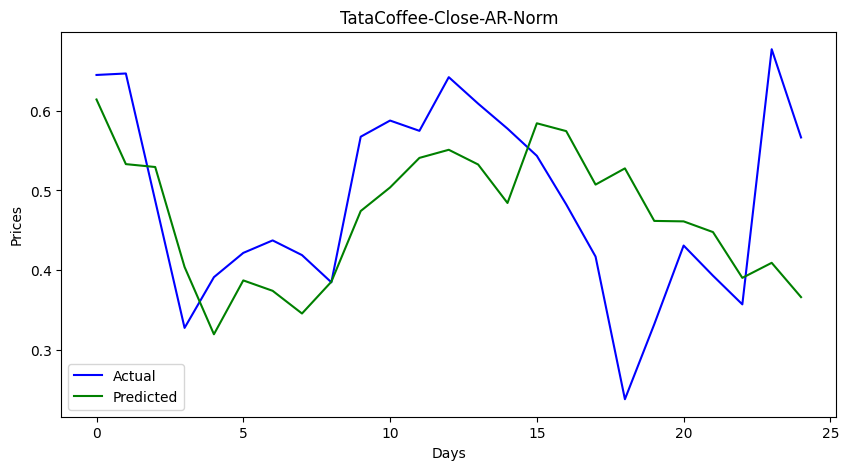

In [13]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [14]:
len(data1)

123

In [15]:
y_test

array([[0.64510166],
       [0.64695009],
       [0.487061  ],
       [0.3271719 ],
       [0.3909427 ],
       [0.42144177],
       [0.43715342],
       [0.41866913],
       [0.3844732 ],
       [0.56746765],
       [0.58780037],
       [0.57486137],
       [0.64232902],
       [0.6090573 ],
       [0.57763401],
       [0.54343808],
       [0.48243993],
       [0.4168207 ],
       [0.23752311],
       [0.33179298],
       [0.43068392],
       [0.39279113],
       [0.35674677],
       [0.67744917],
       [0.56654344]])

In [16]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [17]:
aTestNormTable

,Close
0,0.645102
1,0.64695
2,0.487061
3,0.327172
4,0.390943
5,0.421442
6,0.437153
7,0.418669
8,0.384473
9,0.567468


In [18]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[216.6 ],
       [216.7 ],
       [208.05],
       [199.4 ],
       [202.85],
       [204.5 ],
       [205.35],
       [204.35],
       [202.5 ],
       [212.4 ],
       [213.5 ],
       [212.8 ],
       [216.45],
       [214.65],
       [212.95],
       [211.1 ],
       [207.8 ],
       [204.25],
       [194.55],
       [199.65],
       [205.  ],
       [202.95],
       [201.  ],
       [218.35],
       [212.35]])

In [19]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,216.6
1,216.7
2,208.05
3,199.4
4,202.85
5,204.5
6,205.35
7,204.35
8,202.5
9,212.4


In [20]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [21]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

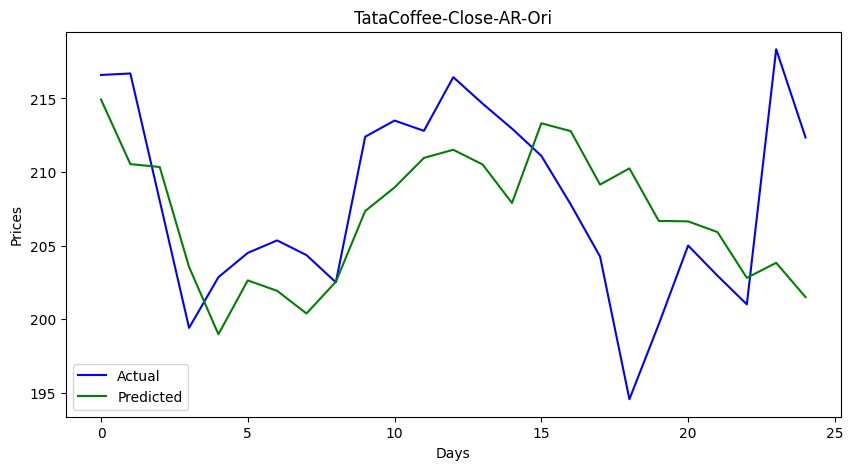

In [22]:
from stockFunctions import conversionSingle
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [23]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 6.063020162209599
maPe-Testset: 0.023026416626792338


In [28]:
forecast=model_fit.predict(len(data1),len(data1)+5)

In [29]:
forecast

array([0.37027131, 0.38717936, 0.37453733, 0.41901228, 0.44006217,
       0.4332295 ])

In [30]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,['Closefore'])
forecast_stock_price_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_oriF=conversionSingle(forecast_stock_price_ori,['Closefore'])
forecast_stock_price_oriF

,Closefore
0,201.731678
1,202.646403
2,201.96247
3,204.368565
4,205.507363
5,205.137716


In [31]:
#forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)